In [1]:
from eca import OneDimensionalElementaryCellularAutomata

## Create a new ECA

In [8]:
configuration = OneDimensionalElementaryCellularAutomata()
str(configuration)

'1100010111001011001111110001111001111111001000000011001001000100001000110010011011010010010110001100'

### Specify width

In [9]:
configuration = OneDimensionalElementaryCellularAutomata(lattice_width=10)
str(configuration)

'1101111011'

### Specify Initial Configuration

In [10]:
configuration = OneDimensionalElementaryCellularAutomata(initial_configuration="000010101111")
str(configuration)

'000010101111'

In [11]:
configuration = OneDimensionalElementaryCellularAutomata(initial_configuration=[0,0,0,0,1,0,1,0,1,1,1,1])
str(configuration)

'000010101111'

In [12]:
configuration = OneDimensionalElementaryCellularAutomata(lattice_width=10,initial_configuration=30)
str(configuration)

'0000011110'

## Evolve it 

In [13]:
configuration = OneDimensionalElementaryCellularAutomata()
for _ in range(100):
    configuration.transition(rule_number=110)

#### Check Rule information

In [5]:
OneDimensionalElementaryCellularAutomata.about_rule(rule_index=110)

{'rule_index': 110,
 'lookup_table': {'111': '0',
  '110': '1',
  '101': '1',
  '100': '0',
  '011': '1',
  '010': '1',
  '001': '1',
  '000': '0'},
 'boolean_cube': {'name': 'FaceEdge',
  'equation': '(x ∧ y) ∨ (¬x ∧ ¬y ∧ ¬z)',
  'logic_gate': <function eca.boolean_cube.BooleanCube.logic_gate.<locals>.<lambda>(x, y, z)>,
  'coloured_edges': 3,
  'chua_geometrical_complexity': 2,
  'class_size': 48}}

## View it

In [14]:
int(configuration)

385029540459953665587927479164

In [15]:
str(configuration)

'0100110111000001100011111000100110111110001110001100010011011100111110001001101110100111001101111100'

In [16]:
configuration.numpy()

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [17]:
configuration.evolution()

array([[0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 0]])

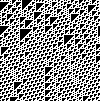

In [18]:
from PIL import Image
Image.fromarray(configuration.evolution().astype('uint8')*255)

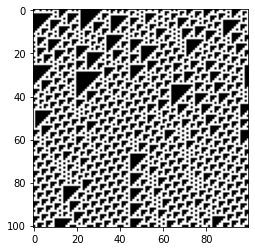

In [19]:
from matplotlib.pyplot import imshow 
imshow(configuration.evolution(),cmap='gray')

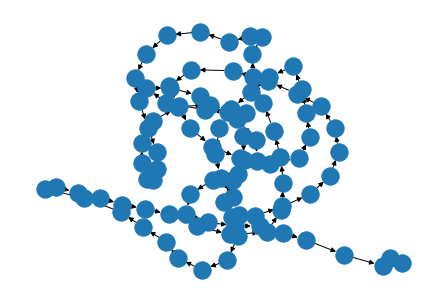

In [23]:
from networkx import DiGraph, draw 

g = DiGraph()
g.add_edges_from(configuration.graph(rule_number=110).items())
draw(g, with_labels=False)

## Play with it

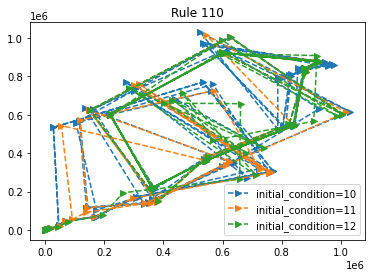

In [2]:
from matplotlib.pyplot import plot, legend, title, show

RULE = 110
WIDTH = 20
DEPTH = 100
for IC in range(10,13):
    configuration = OneDimensionalElementaryCellularAutomata(
        lattice_width=WIDTH, 
        initial_configuration=IC
    )
    for _ in range(DEPTH):
        configuration.transition(rule_number=RULE)
    
    x,y = zip(*configuration.trajectory())
    plot(x,y,'-->',label=f'initial_condition={IC}')
title(f"Rule {RULE}")
legend()
show()